In [1]:
import sys
import numpy as np

sys.path.insert(0, "/usr/src/code/src")

from pre_process_node.imputation import *
from plots import *
from stats import *
from cd_diagram import *
from aeon.datasets import load_from_tsfile
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    balanced_accuracy_score,
)
from scipy.stats import friedmanchisquare
%matplotlib inline


/usr/local/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [22]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
datasets = [
  "ArticularyWordRecognition",
  "BasicMotions",
  "Cricket",
  "ERing",
  "Epilepsy",
  "Heartbeat",
  "JapaneseVowels",
  "LSST",
  "Libras",
  "NATOPS",
  "PEMS-SF",
  "RacketSports",
  "SelfRegulationSCP1",
  "SpokenArabicDigits",
  "UWaveGestureLibrary",
]

models = [
    "RNN",
    "RNNTimestamps",
    "RNNTimestampsDelta",
    "RNNTime2Vec",
    "RNNPE",
    "RNNTPE",
    "RNNLinear",
    "RNNTime2VecDelta",
    "RNNPEDelta",
    "RNNTPEDelta",
    "RNNLinearDelta",
    "Transformer",
    "TransformerTimestamps",
    "TransformerTimestampsDelta",
    "TransformerTime2Vec",
    "TransformerPE",
    "TransformerTPE",
    "TransformerLinear",
    "TransformerTime2VecDelta",
    "TransformerPEDelta",
    "TransformerTPEDelta",
    "TransformerLinearDelta"
]

pmisses = [0, 20, 40, 60, 70, 80, 90]

results, model_mean, pmiss_result, datasets_result = calculate_metrics(
    f1_score,
    base_path,
    datasets,
    models,
    pmisses,
    func_params={"average": "weighted"},
)

In [7]:
test = []
for pmiss, metrics in pmiss_result.items():
    res = friedmanchisquare(*[metrics[model] for model in models])
    test.append({"pmiss": pmiss, "chi-statistic": res.statistic, "p-value": res.pvalue})
test = pl.DataFrame(test)
test
    

pmiss,chi-statistic,p-value
i64,f64,f64
0,27.172456,0.002446
20,34.409617,0.000157
40,36.193372,0.000078
60,26.440061,0.003191
70,29.878012,0.000897
80,14.854369,0.137462
90,16.456502,0.087289


In [25]:
import pandas as pd
pd.DataFrame(model_mean).transpose().round(2)

,0,1,2,3,4,5,6
RNN,0.84,0.80,0.77,0.68,0.62,0.54,0.47
RNNTimestamps,0.85,0.82,0.78,0.68,0.63,0.55,0.45
RNNTimestampsDelta,0.84,0.80,0.76,0.67,0.61,0.55,0.47
RNNTime2Vec,0.86,0.82,0.77,0.68,0.61,0.53,0.44
RNNPE,0.87,0.83,0.77,0.68,0.60,0.53,0.43
RNNTPE,0.86,0.83,0.77,0.67,0.62,0.53,0.44
RNNLinear,0.88,0.85,0.78,0.69,0.61,0.52,0.42
RNNTime2VecDelta,0.87,0.84,0.78,0.67,0.61,0.54,0.45
RNNPEDelta,0.87,0.84,0.78,0.70,0.62,0.56,0.47
RNNTPEDelta,0.86,0.83,0.78,0.69,0.61,0.53,0.45


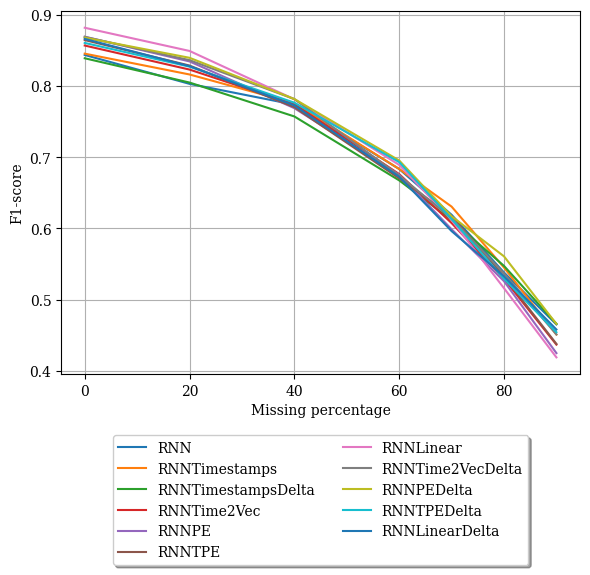

In [ ]:
plot_metric(model_mean, metric="F1-score", save_name="rnn_results")

['Transformer' 'TransformerTimestamps' 'TransformerTimestampsDelta'
 'TransformerTime2Vec' 'TransformerPE' 'TransformerTPE'
 'TransformerLinear' 'TransformerTime2VecDelta' 'TransformerPEDelta'
 'TransformerTPEDelta' 'TransformerLinearDelta']
Transformer                   0.0
TransformerLinear             3.0
TransformerLinearDelta        0.0
TransformerPE                 1.0
TransformerPEDelta            0.0
TransformerTPE                0.0
TransformerTPEDelta           3.0
TransformerTime2Vec           5.0
TransformerTime2VecDelta      1.0
TransformerTimestamps         1.0
TransformerTimestampsDelta    0.0
dtype: float64
Average ranks
Transformer                   8.933333
TransformerTimestampsDelta    7.200000
TransformerTime2VecDelta      6.800000
TransformerTimestamps         6.600000
TransformerLinearDelta        6.533333
TransformerPEDelta            5.933333
TransformerPE                 5.866667
TransformerTPE                5.433333
TransformerTPEDelta           4.933333
Tran

/usr/local/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


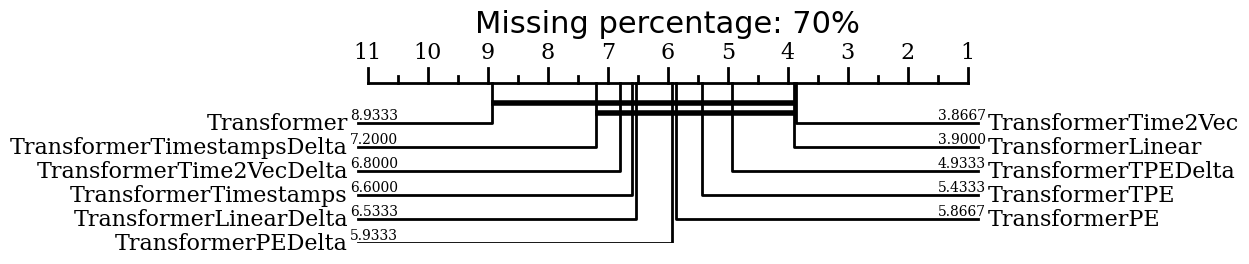

In [16]:
base_path = pathlib.Path("/usr/src/code/data/outputs")
pmiss = 70
metric_name = "f1_score"

datasets = [
  "ArticularyWordRecognition",
  "BasicMotions",
  "Cricket",
  "ERing",
  "Epilepsy",
  "Heartbeat",
  "JapaneseVowels",
  "LSST",
  "Libras",
  "NATOPS",
  "PEMS-SF",
  "RacketSports",
  "SelfRegulationSCP1",
  "SpokenArabicDigits",
  "UWaveGestureLibrary",
]

models = [
    # "RNN",
    # "RNNTimestamps",
    # "RNNTimestampsDelta",
    # "RNNTime2Vec",
    # "RNNPE",
    # "RNNTPE",
    # "RNNLinear",
    # "RNNTime2VecDelta",
    # "RNNPEDelta",
    # "RNNTPEDelta",
    # "RNNLinearDelta",
    "Transformer",
    "TransformerTimestamps",
    "TransformerTimestampsDelta",
    "TransformerTime2Vec",
    "TransformerPE",
    "TransformerTPE",
    "TransformerLinear",
    "TransformerTime2VecDelta",
    "TransformerPEDelta",
    "TransformerTPEDelta",
    "TransformerLinearDelta"
]

df = gather_metric_cd(
    f1_score,
    "f1_score",
    base_path,
    datasets,
    models,
    pmiss,
    func_params={"average": "weighted"},
)
draw_cd_diagram(metric=metric_name, df_perf=df, title=f"Missing percentage: {pmiss}%", labels=True)